## Here we will extract subset of mnist data(70000,28,28) to (6000,28,28) and then we will train ANN on it in cpu

## Neural Network

784 neurons(input layer) --> 128 neurons(hidden layer 1)(RuLU)--> 64 neurons(hidden layer 2)(RuLU) --> 10 neurons(output layer)(Softmax)

## Workflow

1) Dataloader obj
2) Model Building
3) Training Loop
4) Evaluation Loop

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim 

In [2]:
#set random seed for reproducibility
torch.manual_seed(42)

Fashion-MNIST is a dataset designed as a drop-in replacement for the traditional MNIST dataset, but instead of handwritten digits, it contains images of clothing items. It was introduced by Zalando Research to provide a more challenging benchmark for machine learning models.

📌 Fashion-MNIST Details:
70,000 images (60,000 for training, 10,000 for testing)
28x28 pixel grayscale images (same as MNIST)
10 classes, each representing a different type of clothing or accessory.
👕 Class Labels in Fashion-MNIST:
Label	Clothing Item
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


Data Visualization

Figure(640x480)
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
Axes(0.125,0.712609;0.168478x0.167391)
Axes(0.327174,0.712609;0.168478x0.167391)
Axes(0.529348,0.712609;0.168478x0.167391)
Axes(0.731522,0.712609;0.168478x0.167391)
Axes(0.125,0.511739;0.168478x0.167391)
Axes(0.327174,0.511739;0.168478x0.167391)
Axes(0.529348,0.511739;0.168478x0.167391)
Axes(0.731522,0.511739;0.168478x0.167391)
Axes(0.125,0.31087;0.168478x0.167391)
Axes(0.327174,0.31087;0.168478x0.167391)
Axes(0.529348,0.31087;0.168478x0.167391)
Axes(0.731522,0.31087;0.168478x0.167391)
Axes(0.125,0.11;0.168478x0.167391)
Axes(0.327174,0.11;0.168478x0.167391)
Axes(0.529348,0.11;0.168478x0.167391)
Axes(0.731522,0.11;0.168478x0.167391)


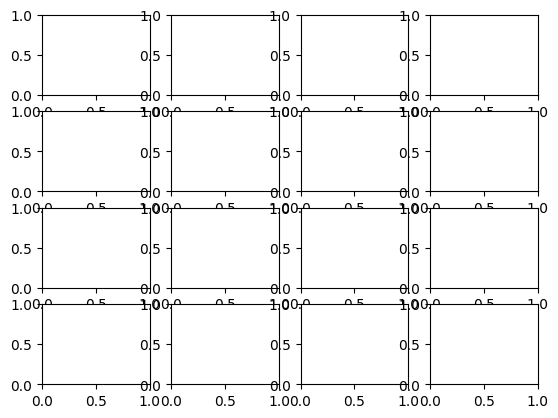

In [4]:
fig , axes = plt.subplots(4,4)
print(fig)
print(axes)

for i in axes.flat:
    print(i)


In [5]:
df.iloc[0,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 125,  72,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0, 120, 108,   0,   0,   4,   6,  11,  17,  80,  24, 224,  30,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          0, 208, 230, 187, 226, 236, 242, 213, 221, 239, 247, 137,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,
          0, 199, 210, 206, 200, 205, 208, 208, 216, 213, 244,  88,   0,
          3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
          6, 213, 218, 201, 197, 207, 212, 209, 219, 220, 240,  77,   0,
          3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   0,
         21, 222, 216, 197, 202, 210, 213, 214, 221, 220, 235,  65,   0,
          3,   0],
       [  

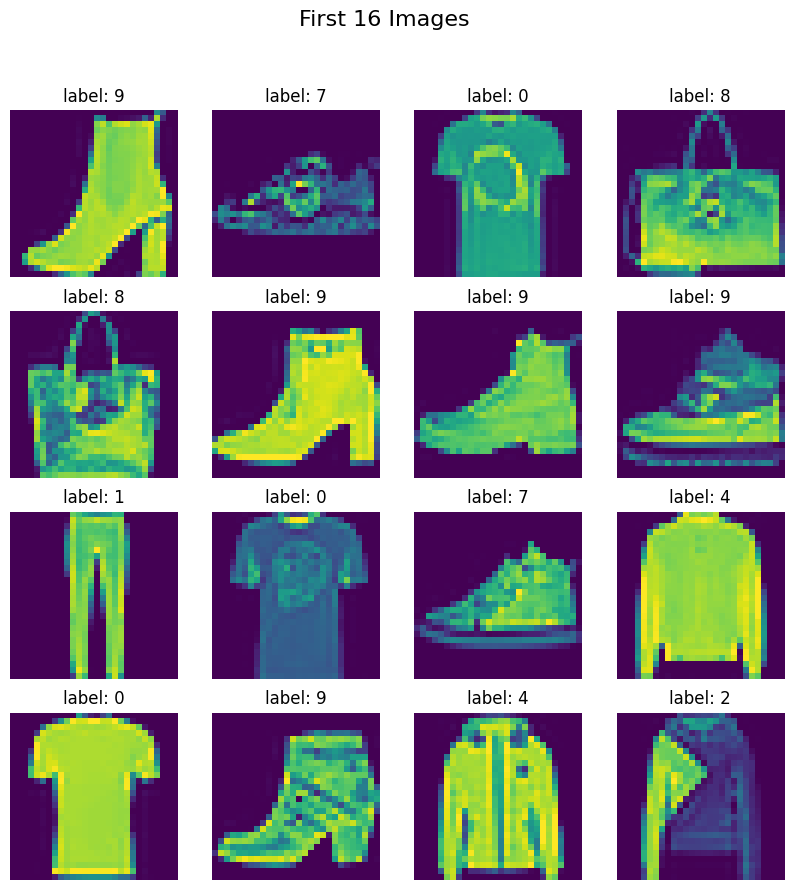

In [6]:
#create a 4*4 grid of images
fig,axes= plt.subplots(4,4,figsize=(10,10))  
# fig is a matplotlib.figure type for the entire diagram
# axes is the 2 dim ie 4,4 list containing each plot as Axes object

fig.suptitle('First 16 Images',fontsize=16)  #gives title to the entire plot

for i,ax in enumerate(axes.flat):    # axes.flat gives a 1d axis iterable so that we can access each axes in sequential manner
    img = df.iloc[i,1:].values.reshape(28,28)   #reshape each row by converting series into numpy array
    ax.imshow(img) #display in that particular axes
    ax.axis('off') #remove axis for a cleaner look
    ax.set_title(f"label: {df.iloc[i,0]}")  #show the label in each title

Train test split

In [7]:
X = df.iloc[:,1:].values
y=df.iloc[:,0].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

each pixel consists value ranging from 0 to 255 so scale data

In [9]:
#scaling the features
X_train = X_train/255
X_test =X_test/255

# Create CustomDataset Class

In [10]:
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.long)
    
    def __len__(self):
        return len(self.features)

    def __getitem__(self,idx):
        return self.features[idx],self.labels[idx]
        

In [11]:
#instance of the class
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)


In [13]:
#create train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)



In [14]:
#define NN class
class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)  #softmax is implicitly present in pytorch cross entropy loss so no need to make it

        )

    def forward(self,features):
        return self.model(features)

In [15]:
#set learning rate and epochs
epochs = 100
lr = 0.1

In [16]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [23]:
len(X_train)

4800

In [18]:
X_train.shape[1]

784

In [21]:
model.parameters

<bound method Module.parameters of MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)>

In [19]:
#instantiate the model
model = MyNN(X_train.shape[1])

#loss function 
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr=lr)


# visualization 

In [27]:
for batch_features,batch_labels in train_loader:
        print(batch_features.shape)
        print(batch_labels.shape)
        break
        

torch.Size([32, 784])
torch.Size([32])


ie in each loop it has batch features and batch labels

In [31]:
len(X_train)

4800

In [30]:
len(X_train) / 32

150.0

In [28]:
len(train_loader) # ie len(train_dataset)/32(batchsize)

150

In [ ]:
len(train_dataset) # ie len(X_train) or len(y_train)

4800

In [32]:
for x,y in train_loader:
    print(x,y)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([4, 1, 9, 3, 6, 6, 7, 2, 4, 4, 7, 6, 7, 5, 1, 3, 0, 1, 3, 2, 0, 8, 4, 6,
        7, 1, 2, 1, 6, 5, 5, 3])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([8, 8, 1, 2, 3, 2, 7, 8, 8, 5, 8, 7, 6, 0, 0, 7, 6, 5, 0, 5, 5, 3, 2, 9,
        9, 8, 5, 8, 4, 1, 1, 8])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([3, 7

In [ ]:
#training loop

for epoch in range(epochs):
    total_epoch_loss =0
    for batch_features,batch_labels in train_loader:
        #forward pass
        y_pred = model(batch_features)
        print("shape of y_pred",y_pred.shape)
        print("y_pred",y_pred)
        
        
        #loss 
        batch_loss = criterion(y_pred,batch_labels)
        print("Batch_loss",batch_loss)
        
        optimizer.zero_grad()

        #backward pass
        batch_loss.backward()

        #parameters update
        optimizer.step()

        total_epoch_loss += batch_loss.item()
    
    
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epochs: {epoch+1}, Loss: {avg_loss}')


        

shape of y_pred torch.Size([32, 10])
y_pred tensor([[-6.7301e+00, -1.8352e+00, -5.5827e+00, -2.0790e-01, -2.2242e+00,
          8.8521e+00, -6.7202e+00,  1.3668e+01,  7.6599e-01,  9.1240e-01],
        [ 1.7986e+01, -7.2223e+00,  3.8035e+00,  3.6505e+00, -6.0356e+00,
         -6.0383e+00,  1.1297e+01, -1.0369e+01,  2.1173e+00, -9.5828e+00],
        [ 2.0301e+00, -4.2018e+00,  5.1250e+00,  5.4703e-01,  1.7875e+00,
         -1.0173e+00,  6.1880e+00, -4.9968e+00, -2.7468e-01, -5.9109e+00],
        [-1.3444e+00, -2.4657e+00, -1.1978e+00,  1.1327e+00, -1.0972e+00,
          7.7730e+00, -9.9268e-01,  1.6448e+00, -1.4210e-01, -3.1651e+00],
        [-3.4801e+00, -4.0762e+00,  3.9884e+00, -2.5724e+00,  4.7015e+00,
          1.3107e+00,  6.3330e+00, -4.7059e+00, -4.3772e-02, -2.8246e+00],
        [-6.6358e-01,  1.6649e+01, -1.3648e+00,  7.0624e+00,  2.0383e+00,
         -7.2497e+00, -8.3301e+00, -8.8018e-01, -3.8031e+00, -4.7443e+00],
        [-2.3950e-01,  1.2760e+01,  7.4216e-01,  4.2119e+00,  

 In calculation of loss  y_pred is of shape [32,10] and batch_labels is of shape [32] since we didnt use softmax act fun at last how loss calculation works

PyTorch's nn.CrossEntropyLoss automatically applies nn.LogSoftmax() followed by the negative log-likelihood loss (NLLLoss).

y_pred = torch.tensor([[2.0, 1.0, 0.1],  # Sample 1 
 [0.5, 2.5, 1.2]]) # Sample 2 (logits for 3 classes)

Shape: [2, 3] (batch size = 2, number of classes = 3)

batch_labels = torch.tensor([0, 1])  

This means:

The correct class for Sample 1 is Class 0.
The correct class for Sample 2 is Class 1.

criterion = nn.CrossEntropyLoss() <br>
loss = criterion(y_pred, batch_labels)


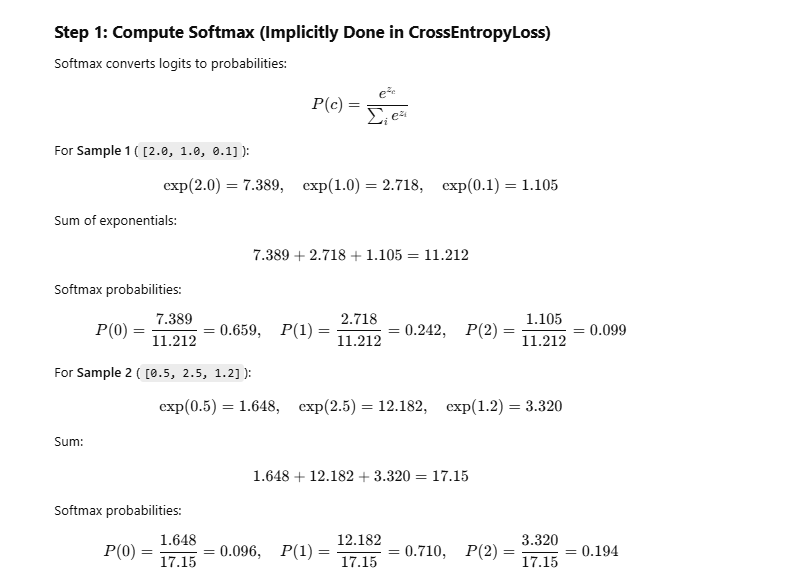

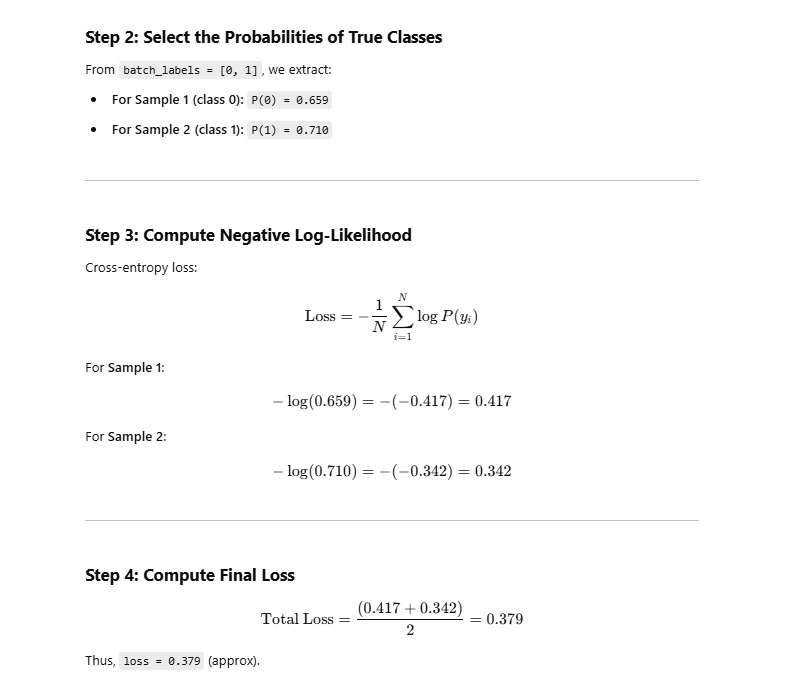

set model to eval mode


In [40]:
model.eval()


MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [58]:
#evaluation code
correct =0

with torch.no_grad():
    for batch_features,batch_labels in test_loader:
        y_pred = model(batch_features) # in shape of [32(batch_size) , 10(classes)]
        #now extract labels for the final class
        _,y_pred = torch.max(y_pred,1)  #torch.max(tensor,1) gives the two tensors one of max values and other of indices of max_values in each row

        correct += (y_pred == batch_labels).sum().item()  #or (y_pred == batch_labels).float().sum().item()

    acc = correct /len(test_dataset)
    print("Accuracy :",acc)




Accuracy : 0.835
